<a href="https://www.kaggle.com/code/gargivipat/abroad-edu-cost?scriptVersionId=202890802" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/abroad-study-cost-predictor/abroad  - Sheet1.csv


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## About Dataset
This dataset provides information about the yearly fees for various courses offered by colleges and universities across different countries. The data is sourced from Jeduka.com, a platform known for providing detailed insights into educational opportunities abroad. The dataset consists of four key columnsptions.

* COUNTRY: The country where the course is offered.
* COURSE: The specific course being offered (e.g., Engineering, Medicine, Business).
* COURSE TYPE: The type of course (e.g., Bachelor's, Master's, Diploma).
* FEES: The yearly tuition fees for the course in the respective country (in local currency).

This dataset is ideal for those interested in comparing study costs across countries and analyzing trends in international education expenses. It can be utilized to predict and compare fees based on various parameters, helping students make informed decisions about their study abroad options.

## Loading Data

In [3]:
df = pd.read_csv("/kaggle/input/abroad-study-cost-predictor/abroad  - Sheet1.csv")

In [4]:
df.head(10)

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
0,GERMANY,MBA,MBA in Sales & Marketing,3678127.31
1,GERMANY,MBA,MBA in Banking,1253594.37
2,GERMANY,MBA,MBA in Business Administration,454540.69
3,GERMANY,MBA,MBA in Hospital/Healthcare Management,3246719.22
4,GERMANY,MBA,MBA in Human Resource Management,1217519.71
5,GERMANY,MBA,MBA in Internal Business,1442986.32
6,GERMANY,MBA,MBA in Supply Chain & Logistics Management,1112181.71
7,GERMANY,MBA,MBA in General Management,1420439.66
8,GERMANY,MBA,MBA in Global Business Management,1339271.68
9,GERMANY,MBA,MBA in Entrepreneurship & Leadership Management,1147174.12


## Data Preprocessing

In [5]:
df.shape

(489, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTRY                  489 non-null    object
 1   COURSE TYPE              489 non-null    object
 2   COURSE (SPECIALIZATION)  489 non-null    object
 3   FEES                     489 non-null    object
dtypes: object(4)
memory usage: 15.4+ KB


In [7]:
df.describe()

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
count,489,489,489,489
unique,11,4,189,385
top,GERMANY,MASTERS OF MANAGEMENT,M.ENG in Electrical,904770
freq,61,166,11,10


In [8]:
df.COUNTRY.unique()

array(['GERMANY', 'USA', 'CANADA', 'FRANCE', 'CHINA', 'UK', 'AUSTRALIA',
       'RUSSIA', 'SINGAPORE', 'ITALY', 'BELGIUM'], dtype=object)

In [9]:
df["COURSE TYPE"].unique()

array(['MBA', 'MASTERS OF MANAGEMENT', 'M.ENG', 'M.Sc'], dtype=object)

In [10]:
df["COURSE (SPECIALIZATION)"].unique()

array(['MBA in Sales & Marketing ', 'MBA in Banking',
       'MBA in Business Administration',
       'MBA in Hospital/Healthcare Management',
       'MBA in Human Resource Management', 'MBA in Internal Business',
       'MBA in Supply Chain & Logistics Management',
       'MBA in General Management', 'MBA in Global Business Management',
       'MBA in Entrepreneurship & Leadership Management',
       'MBA in Tourism', 'MBA in Business Engineer', 'MBA in Finance',
       'MBA in Accounting', 'MBA in Project Management',
       'MBA in E-Sports Management',
       'MASTERS OF MANAGEMENT in Hotel Management',
       'MASTERS OF MANAGEMENT in Marketing',
       'MASTERS OF MANAGEMENT in Event Management',
       'MASTERS OF MANAGEMENT in Luxury & Brand',
       'MASTERS OF MANAGEMENT in Logistics & Supply Chain ',
       'MASTERS OF MANAGEMENT in International Business ',
       'MASTERS OF MANAGEMENT in Supply Chain Management',
       'MASTERS OF MANAGEMENT in Hospital/Healthcare Manage

In [11]:
len(df["COURSE (SPECIALIZATION)"].unique())

189

In [12]:
df.isnull().sum()

COUNTRY                    0
COURSE TYPE                0
COURSE (SPECIALIZATION)    0
FEES                       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
g_d = df.groupby('COUNTRY')[['FEES', 'COURSE TYPE']].max().reset_index().sort_values(by ='FEES')
g_d.head(60)

,COUNTRY,FEES,COURSE TYPE
0,AUSTRALIA,3660048.53,MBA
7,RUSSIA,494819.06,MBA
9,UK,686706.08,MBA
8,SINGAPORE,817062.43,MBA
10,USA,877568.94,MBA
1,BELGIUM,90340,MBA
3,CHINA,908534.05,MBA
4,FRANCE,981415.32,MBA
5,GERMANY,986647.13,MBA
6,ITALY,993437.46,MBA


## Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='COUNTRY', ylabel='count'>

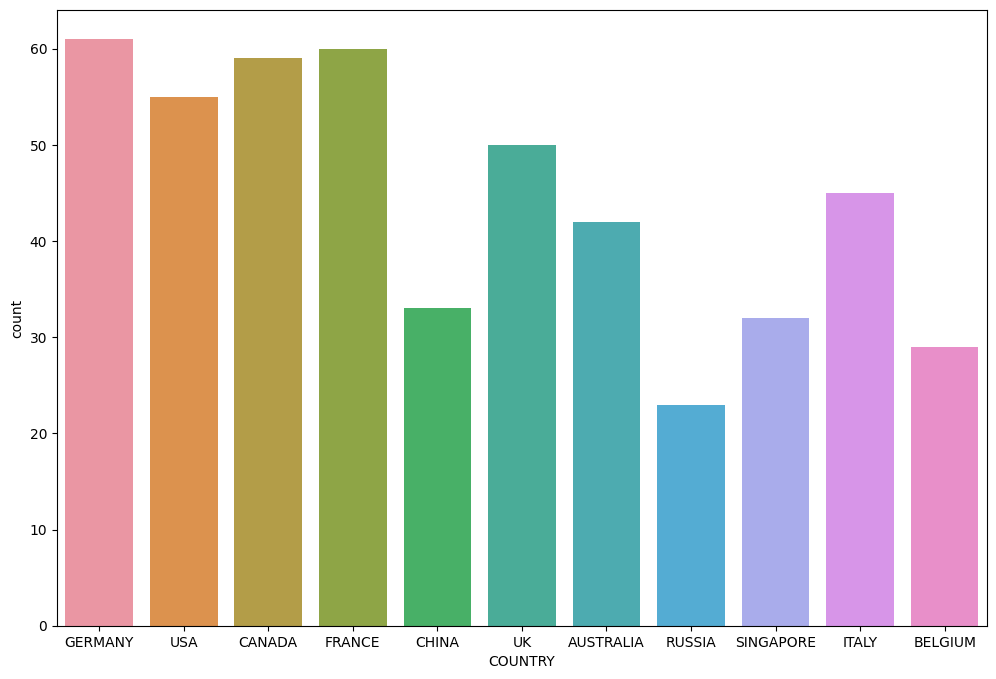

In [16]:
plt.subplots(figsize=(12,8))
sns.countplot(data= df, x='COUNTRY')

<Axes: xlabel='COURSE TYPE', ylabel='count'>

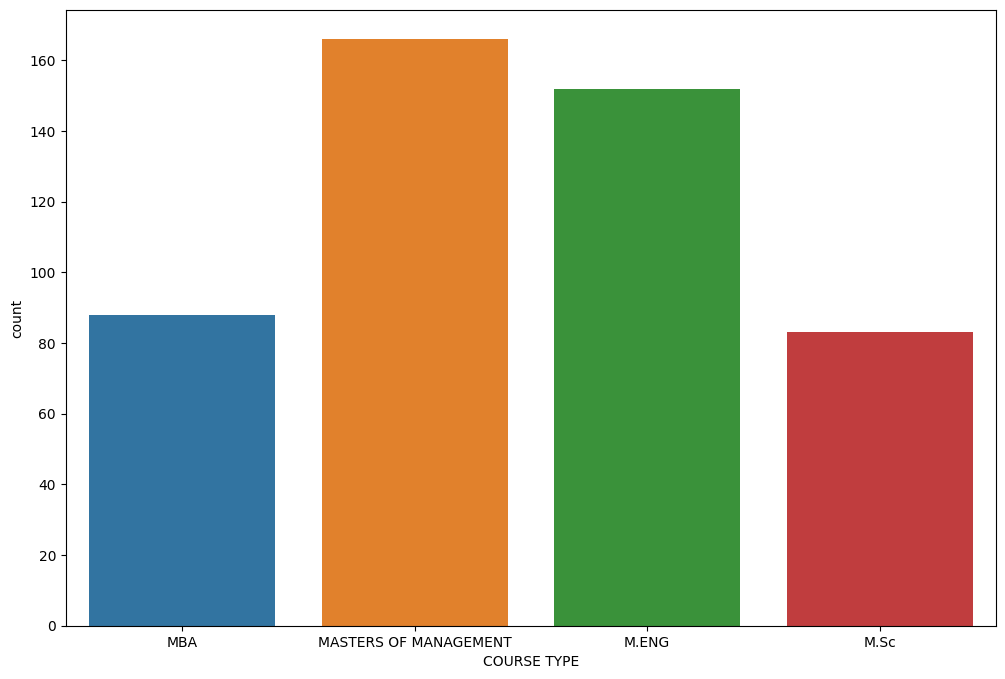

In [17]:
plt.subplots(figsize=(12,8))
sns.countplot(data= df, x='COURSE TYPE')

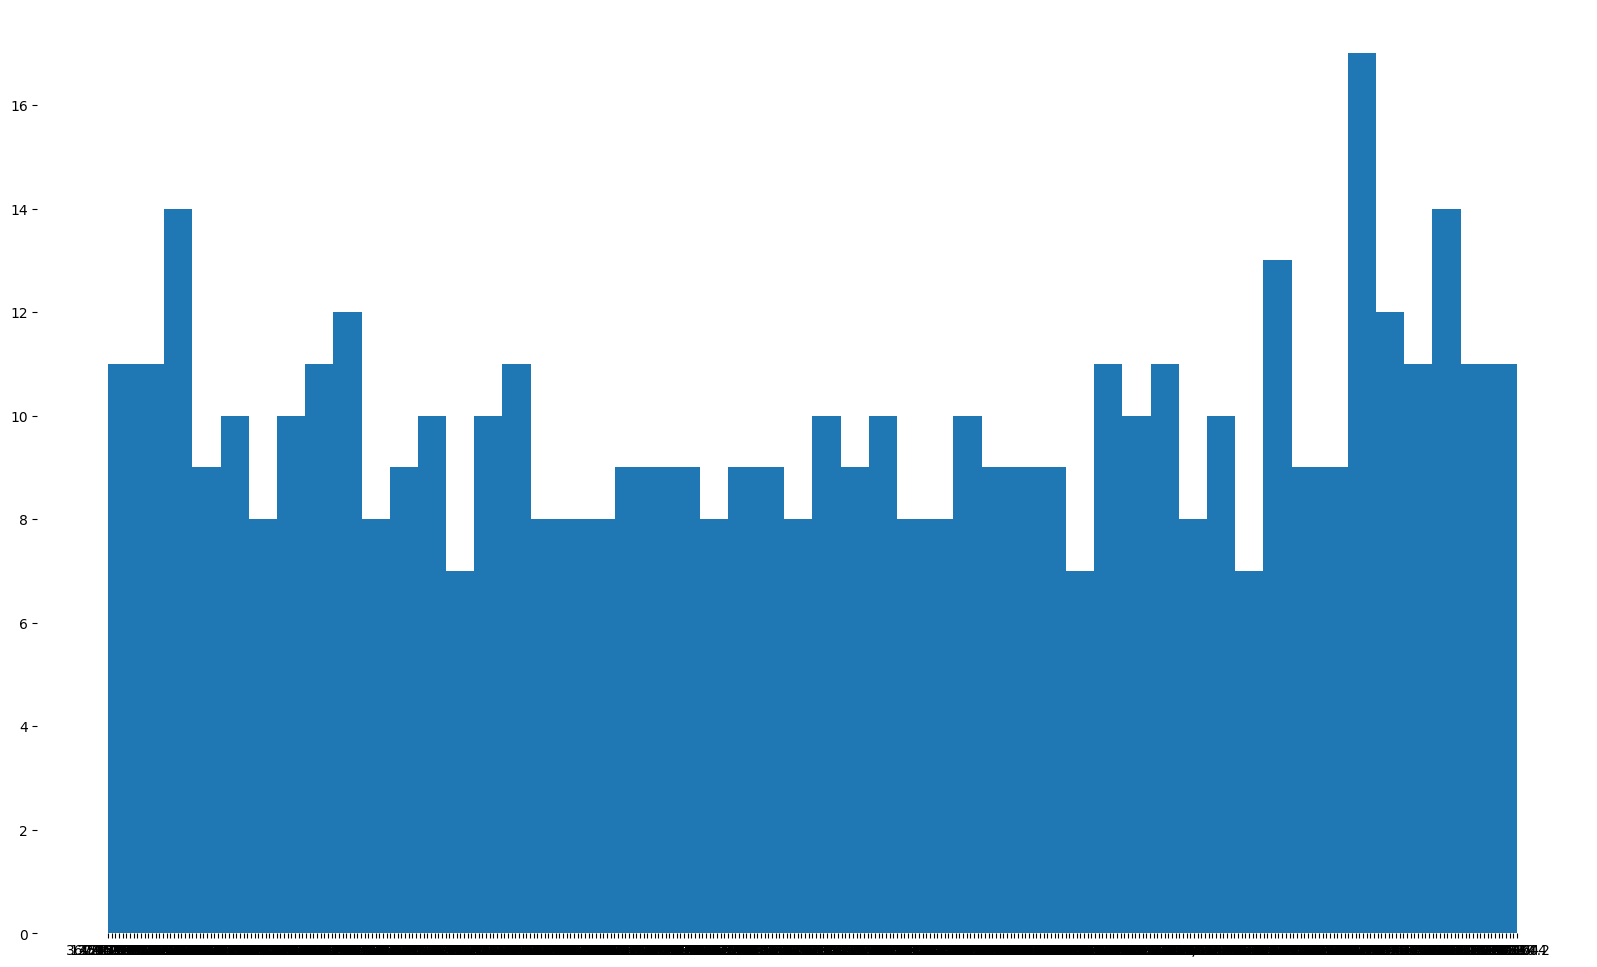

In [18]:
plt.subplots(figsize=(20,12))
plt.hist(df["FEES"],bins=50)
plt.box(False)